# RBM Homework

## Assignment by Samvram Sahu, Arnab Karmakar 

In [1]:
# Preprocessing the data

from scipy.io import loadmat
import numpy as np
digitRBM = loadmat('digitrbm/digitRBM.mat')

print('Contents of digitRBM are: ')
for key in digitRBM.keys():
    if type(digitRBM[key]) is str:
        print(key + ':' + digitRBM[key])
    else:
        print(key + ': list of length ' + str(len(digitRBM[key])))

Contents of digitRBM are: 
__version__:1.0
targets: list of length 10000
__globals__: list of length 0
data: list of length 10000
__header__: list of length 76


In [2]:
# Converting to numpy arrays for better operations:

data = np.array(digitRBM['data'])
targets = np.array(digitRBM['targets'])

print('Shape of the variables: ')
print('data   : '+str(data.shape))
print('targets : '+str(targets.shape))

Shape of the variables: 
data   : (10000, 784)
targets : (10000, 10)


# The data and targets now

Data is a 2d array containing 10000 images of 28x28 size, this 28x28 is linearised as 784.
There are 10 classes from into which these images are classified into, and these are stored in 1 hot encoded form in the targets array.

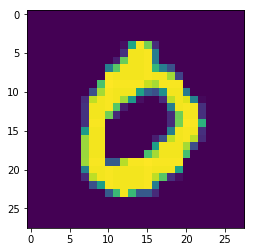

In [3]:
# Visualizing the data

from matplotlib import pylab as plt
%matplotlib inline

plt.imshow(np.reshape(data[0],(28,28)))

## Training

We start by defining the weight matrix for 10 input units and 10 hidden units

In [4]:
num_visible = 784
num_hidden = 10

weights = np.zeros((num_visible,num_hidden))

# Insert weights for the bias units into the first row and first column.
weights = np.insert(weights, 0, 0, axis = 0)
weights = np.insert(weights, 0, 0, axis = 1)

Now, we define a train function which implements Contrastive Divergence

In [5]:
def logistic(x):
    return 1.0 / (1 + np.exp(-x))

In [6]:
def train(data, weights, max_epochs = 5000, learning_rate = 0.1, debug_print=True):
    """
    Train the machine.
    Parameters
    ----------
    data: A matrix where each row is a training example consisting of the states of visible units.    
    """

    num_examples = data.shape[0]

    # Insert bias units of 1 into the first column.
    data = np.insert(data, 0, 1, axis = 1)
    errors = []
    for epoch in range(max_epochs):      
        # Clamp to the data and sample from the hidden units. 
        # (This is the "positive CD phase", aka the reality phase.)
        pos_hidden_activations = np.dot(data, weights)      
        pos_hidden_probs = logistic(pos_hidden_activations)
        pos_hidden_probs[:,0] = 1 # Fix the bias unit.
        pos_hidden_states = pos_hidden_probs > np.random.rand(num_examples, num_hidden + 1)
        # Note that we're using the activation *probabilities* of the hidden states, not the hidden states       
        # themselves, when computing associations. We could also use the states; see section 3 of Hinton's 
        # "A Practical Guide to Training Restricted Boltzmann Machines" for more.
        pos_associations = np.dot(data.T, pos_hidden_probs)

        # Reconstruct the visible units and sample again from the hidden units.
        # (This is the "negative CD phase", aka the daydreaming phase.)
        neg_visible_activations = np.dot(pos_hidden_states, weights.T)
        neg_visible_probs = logistic(neg_visible_activations)
        neg_visible_probs[:,0] = 1 # Fix the bias unit.
        neg_hidden_activations = np.dot(neg_visible_probs, weights)
        neg_hidden_probs = logistic(neg_hidden_activations)
        # Note, again, that we're using the activation *probabilities* when computing associations, not the states 
        # themselves.
        neg_associations = np.dot(neg_visible_probs.T, neg_hidden_probs)

        # Update weights.
        weights += learning_rate * ((pos_associations - neg_associations) / num_examples)

        error = np.sum((data - neg_visible_probs) ** 2)
        errors.append(error)
        if debug_print:
            print("Epoch %s: error is %s" % (epoch, error))
    return(weights, errors)

In [7]:
## Training with help of the function created

In [8]:
(weights,errors) = train(data, weights, max_epochs=5000, debug_print=True)

Epoch 0: error is 1814517.0343098794
Epoch 1: error is 1685071.1073466302
Epoch 2: error is 1624433.4865565158
Epoch 3: error is 1548468.335850003
Epoch 4: error is 1526886.5852946306
Epoch 5: error is 1197759.833071534
Epoch 6: error is 1300298.1358791639
Epoch 7: error is 1044955.4703522676
Epoch 8: error is 1161677.4037288157
Epoch 9: error is 939605.456657556
Epoch 10: error is 1048272.7293291705
Epoch 11: error is 876188.9608797795
Epoch 12: error is 970682.1235862726
Epoch 13: error is 832033.2433220623
Epoch 14: error is 909918.5357263954
Epoch 15: error is 799340.2372079884
Epoch 16: error is 862472.7541403029
Epoch 17: error is 775296.0637717578
Epoch 18: error is 827014.1216381438
Epoch 19: error is 758748.2941318518
Epoch 20: error is 799163.985710525
Epoch 21: error is 746267.0287013939
Epoch 22: error is 777952.393217516
Epoch 23: error is 737918.0528181723
Epoch 24: error is 761153.7398203069
Epoch 25: error is 731763.6991772412
Epoch 26: error is 747423.53621501
Epoch 27

Epoch 220: error is 841859.3465730916
Epoch 221: error is 840413.8785150258
Epoch 222: error is 839649.8549558015
Epoch 223: error is 839303.348777627
Epoch 224: error is 839993.3069097663
Epoch 225: error is 838365.4052256304
Epoch 226: error is 840279.598181801
Epoch 227: error is 839550.3186792628
Epoch 228: error is 836939.4317342524
Epoch 229: error is 836959.0052577314
Epoch 230: error is 838607.3989104336
Epoch 231: error is 836919.3076658023
Epoch 232: error is 837853.2814170344
Epoch 233: error is 836341.4127214655
Epoch 234: error is 836165.5375074132
Epoch 235: error is 836032.6375167193
Epoch 236: error is 835427.7041387383
Epoch 237: error is 833736.6844401413
Epoch 238: error is 834174.6066382168
Epoch 239: error is 831759.4421628318
Epoch 240: error is 831483.417550522
Epoch 241: error is 831186.787084862
Epoch 242: error is 831210.193335203
Epoch 243: error is 831022.0845497521
Epoch 244: error is 830593.935971595
Epoch 245: error is 828694.246614087
Epoch 246: error is

Epoch 437: error is 686656.6136649024
Epoch 438: error is 688249.2042128459
Epoch 439: error is 685063.7981903735
Epoch 440: error is 687359.8104056005
Epoch 441: error is 684030.2088219328
Epoch 442: error is 686611.2542891776
Epoch 443: error is 682638.4118789174
Epoch 444: error is 685436.1994474367
Epoch 445: error is 681552.0790706278
Epoch 446: error is 684154.4935224416
Epoch 447: error is 680299.9988743555
Epoch 448: error is 682942.5551806301
Epoch 449: error is 678730.6197054425
Epoch 450: error is 682081.5267571408
Epoch 451: error is 678652.7189073139
Epoch 452: error is 681095.981354065
Epoch 453: error is 677515.7181830051
Epoch 454: error is 680027.2922320674
Epoch 455: error is 675960.338988935
Epoch 456: error is 678180.234397776
Epoch 457: error is 675188.2083343018
Epoch 458: error is 678132.3865364677
Epoch 459: error is 673625.9803603132
Epoch 460: error is 676068.1146173298
Epoch 461: error is 673284.6041394463
Epoch 462: error is 675018.1143361258
Epoch 463: erro

Epoch 654: error is 608484.513900306
Epoch 655: error is 607858.8399690383
Epoch 656: error is 607736.8299033341
Epoch 657: error is 607583.9894957625
Epoch 658: error is 607498.4624896738
Epoch 659: error is 607263.6604874807
Epoch 660: error is 607627.3300530742
Epoch 661: error is 606638.1362129826
Epoch 662: error is 606485.5748618861
Epoch 663: error is 606460.4796335889
Epoch 664: error is 606473.6076894952
Epoch 665: error is 606078.5687301115
Epoch 666: error is 605944.0352850733
Epoch 667: error is 605774.042735672
Epoch 668: error is 605416.1433818879
Epoch 669: error is 604997.9285673667
Epoch 670: error is 605235.7009866881
Epoch 671: error is 604674.0977012579
Epoch 672: error is 604142.649137115
Epoch 673: error is 604426.3151030315
Epoch 674: error is 603916.6585182484
Epoch 675: error is 603800.8552991236
Epoch 676: error is 603719.2134913714
Epoch 677: error is 603237.0435279785
Epoch 678: error is 603250.0252131058
Epoch 679: error is 602828.4771423285
Epoch 680: erro

Epoch 871: error is 574335.7357990674
Epoch 872: error is 574006.0634312877
Epoch 873: error is 573707.3830058116
Epoch 874: error is 573684.353228082
Epoch 875: error is 574023.4694874622
Epoch 876: error is 573778.6251705972
Epoch 877: error is 573446.1570734582
Epoch 878: error is 573760.2378203025
Epoch 879: error is 573019.8041610561
Epoch 880: error is 573332.9287602163
Epoch 881: error is 573209.3433475508
Epoch 882: error is 573036.2044338667
Epoch 883: error is 572520.7398853516
Epoch 884: error is 572901.2600809464
Epoch 885: error is 572713.2747395533
Epoch 886: error is 572639.3527244215
Epoch 887: error is 572533.9635298931
Epoch 888: error is 572562.1535018143
Epoch 889: error is 572285.895918885
Epoch 890: error is 572095.3155241323
Epoch 891: error is 572403.5218598822
Epoch 892: error is 572131.9872417691
Epoch 893: error is 571958.7123100118
Epoch 894: error is 571401.775926703
Epoch 895: error is 571874.4885283133
Epoch 896: error is 571861.8443245131
Epoch 897: erro

Epoch 1085: error is 555474.5243873819
Epoch 1086: error is 555575.2631114207
Epoch 1087: error is 555329.6028688173
Epoch 1088: error is 555215.3068212562
Epoch 1089: error is 555137.9106978711
Epoch 1090: error is 555241.0123984904
Epoch 1091: error is 554995.6783730823
Epoch 1092: error is 554963.9932138765
Epoch 1093: error is 554928.8441803759
Epoch 1094: error is 554925.294547426
Epoch 1095: error is 554777.3501856284
Epoch 1096: error is 554720.4992273003
Epoch 1097: error is 554837.5781024512
Epoch 1098: error is 554704.6039485119
Epoch 1099: error is 554529.7732835034
Epoch 1100: error is 554713.7545146954
Epoch 1101: error is 554403.8847128258
Epoch 1102: error is 554372.68525303
Epoch 1103: error is 554128.857047628
Epoch 1104: error is 554137.0053659042
Epoch 1105: error is 554210.4368603224
Epoch 1106: error is 554015.7972243717
Epoch 1107: error is 554050.7146565001
Epoch 1108: error is 553862.1951585879
Epoch 1109: error is 553947.3764247526
Epoch 1110: error is 553517.4

Epoch 1296: error is 542079.3364450753
Epoch 1297: error is 542045.1294895763
Epoch 1298: error is 542073.6683983054
Epoch 1299: error is 541691.1917117817
Epoch 1300: error is 541607.4915064711
Epoch 1301: error is 541628.6178366633
Epoch 1302: error is 541800.2548905973
Epoch 1303: error is 541328.2834500724
Epoch 1304: error is 541472.5746804869
Epoch 1305: error is 541208.017835362
Epoch 1306: error is 541200.7058024242
Epoch 1307: error is 541213.4013220451
Epoch 1308: error is 540603.8532371293
Epoch 1309: error is 540572.8017995169
Epoch 1310: error is 540219.1105568127
Epoch 1311: error is 540336.9919257796
Epoch 1312: error is 540275.9028687011
Epoch 1313: error is 540496.6067377221
Epoch 1314: error is 540007.3670331053
Epoch 1315: error is 539591.5991549147
Epoch 1316: error is 539823.337682715
Epoch 1317: error is 539269.8572455415
Epoch 1318: error is 539075.8094913913
Epoch 1319: error is 538945.8767197916
Epoch 1320: error is 538935.1150573276
Epoch 1321: error is 538413

Epoch 1505: error is 504981.4458802779
Epoch 1506: error is 504987.42190663965
Epoch 1507: error is 504908.1050052411
Epoch 1508: error is 504740.23592085874
Epoch 1509: error is 504721.40651969885
Epoch 1510: error is 504591.88255503157
Epoch 1511: error is 504895.19025357295
Epoch 1512: error is 504917.93905423913
Epoch 1513: error is 504459.34662499843
Epoch 1514: error is 504701.21916890115
Epoch 1515: error is 504616.50501230743
Epoch 1516: error is 504491.623678514
Epoch 1517: error is 504662.6489179505
Epoch 1518: error is 504348.0080864316
Epoch 1519: error is 504399.5195057794
Epoch 1520: error is 504310.9762039429
Epoch 1521: error is 504222.9284679444
Epoch 1522: error is 504326.3683993948
Epoch 1523: error is 504307.08607787854
Epoch 1524: error is 504218.250291346
Epoch 1525: error is 504103.2268860169
Epoch 1526: error is 504046.488965519
Epoch 1527: error is 503986.7820834718
Epoch 1528: error is 503978.5650169641
Epoch 1529: error is 504032.306111842
Epoch 1530: error i

Epoch 1714: error is 497173.73191802826
Epoch 1715: error is 497218.2377700757
Epoch 1716: error is 497319.2219334458
Epoch 1717: error is 497183.29582821496
Epoch 1718: error is 497072.10371961223
Epoch 1719: error is 497056.77514797857
Epoch 1720: error is 497159.5011258069
Epoch 1721: error is 496931.13468930766
Epoch 1722: error is 496845.1238534934
Epoch 1723: error is 497051.18603367114
Epoch 1724: error is 496774.3008199567
Epoch 1725: error is 496682.5876067693
Epoch 1726: error is 496843.81599429675
Epoch 1727: error is 496774.24451219814
Epoch 1728: error is 496664.66757458163
Epoch 1729: error is 496826.43217095826
Epoch 1730: error is 496430.39953243016
Epoch 1731: error is 496476.0529173291
Epoch 1732: error is 496665.3029607244
Epoch 1733: error is 496531.45126216806
Epoch 1734: error is 496554.13983042794
Epoch 1735: error is 496392.8555501942
Epoch 1736: error is 496332.3623076346
Epoch 1737: error is 496425.2794395934
Epoch 1738: error is 496235.27429620473
Epoch 1739:

Epoch 1923: error is 490229.3805391602
Epoch 1924: error is 490242.52470380726
Epoch 1925: error is 490297.63102999935
Epoch 1926: error is 490031.43088411534
Epoch 1927: error is 490185.5263773007
Epoch 1928: error is 490104.8952358821
Epoch 1929: error is 490077.48249646655
Epoch 1930: error is 489936.9837715547
Epoch 1931: error is 490268.04675188474
Epoch 1932: error is 489788.44337215193
Epoch 1933: error is 490175.16285110055
Epoch 1934: error is 490054.3496798623
Epoch 1935: error is 490096.6336728665
Epoch 1936: error is 489929.99634574837
Epoch 1937: error is 489908.69533036207
Epoch 1938: error is 489977.6195432239
Epoch 1939: error is 489847.51617456746
Epoch 1940: error is 490042.3556223898
Epoch 1941: error is 489974.5071273402
Epoch 1942: error is 489876.7224229574
Epoch 1943: error is 489625.4965725682
Epoch 1944: error is 489824.95987481566
Epoch 1945: error is 489441.2916574901
Epoch 1946: error is 489620.5432309393
Epoch 1947: error is 489349.53625583707
Epoch 1948: e

Epoch 2132: error is 485795.136895794
Epoch 2133: error is 486172.9563388055
Epoch 2134: error is 485865.2757860774
Epoch 2135: error is 486154.8316950726
Epoch 2136: error is 485736.31204606494
Epoch 2137: error is 485820.240983166
Epoch 2138: error is 485815.00600816443
Epoch 2139: error is 485704.058454006
Epoch 2140: error is 485889.7821319335
Epoch 2141: error is 485876.66147123155
Epoch 2142: error is 485982.9522873569
Epoch 2143: error is 485857.46665992466
Epoch 2144: error is 485819.24004942883
Epoch 2145: error is 485733.76606125175
Epoch 2146: error is 485620.3841457673
Epoch 2147: error is 485809.80232578237
Epoch 2148: error is 485720.165996032
Epoch 2149: error is 485807.88289395673
Epoch 2150: error is 485680.0728441675
Epoch 2151: error is 485779.8164196943
Epoch 2152: error is 485792.5819972972
Epoch 2153: error is 485669.1651499736
Epoch 2154: error is 485470.7514505664
Epoch 2155: error is 485465.92554473446
Epoch 2156: error is 485769.19095089857
Epoch 2157: error i

Epoch 2341: error is 482785.3165504656
Epoch 2342: error is 482870.32297094614
Epoch 2343: error is 482914.1639203093
Epoch 2344: error is 482703.16825705493
Epoch 2345: error is 482926.25003408303
Epoch 2346: error is 482805.68503966683
Epoch 2347: error is 482674.87556239695
Epoch 2348: error is 482577.2817515158
Epoch 2349: error is 482575.8985665707
Epoch 2350: error is 482726.1173418749
Epoch 2351: error is 482768.2931330198
Epoch 2352: error is 482730.24013956945
Epoch 2353: error is 482754.22191865207
Epoch 2354: error is 482774.4441660743
Epoch 2355: error is 482573.9403347988
Epoch 2356: error is 482531.9413914214
Epoch 2357: error is 482774.7069270673
Epoch 2358: error is 482686.68851087446
Epoch 2359: error is 482603.6105154646
Epoch 2360: error is 482623.0863610914
Epoch 2361: error is 482180.70699643693
Epoch 2362: error is 482737.0305890915
Epoch 2363: error is 482406.23803300597
Epoch 2364: error is 482485.9111981711
Epoch 2365: error is 482431.1717132733
Epoch 2366: err

Epoch 2549: error is 480310.21630784863
Epoch 2550: error is 480248.22596319293
Epoch 2551: error is 480244.7985270687
Epoch 2552: error is 480324.1623456645
Epoch 2553: error is 479995.51896243915
Epoch 2554: error is 480337.0431074219
Epoch 2555: error is 480215.48019042617
Epoch 2556: error is 480128.5751732807
Epoch 2557: error is 480115.1308124341
Epoch 2558: error is 480250.37386740436
Epoch 2559: error is 480282.46799000894
Epoch 2560: error is 480251.11448042316
Epoch 2561: error is 480004.748137502
Epoch 2562: error is 480043.09436522424
Epoch 2563: error is 479955.8014263931
Epoch 2564: error is 480149.59910225926
Epoch 2565: error is 479966.0365993494
Epoch 2566: error is 480038.01195304666
Epoch 2567: error is 480063.94727512327
Epoch 2568: error is 479877.91461349744
Epoch 2569: error is 480024.79692338733
Epoch 2570: error is 480195.47378799773
Epoch 2571: error is 480216.3258854304
Epoch 2572: error is 479884.0397779865
Epoch 2573: error is 479940.84600036015
Epoch 2574:

Epoch 2758: error is 477743.0655503585
Epoch 2759: error is 477816.4542274944
Epoch 2760: error is 477992.89249586605
Epoch 2761: error is 477947.19814373646
Epoch 2762: error is 477796.181561387
Epoch 2763: error is 477719.4974856507
Epoch 2764: error is 477607.6247074327
Epoch 2765: error is 477928.2701145794
Epoch 2766: error is 477841.81936731515
Epoch 2767: error is 477858.329929967
Epoch 2768: error is 477595.9421482105
Epoch 2769: error is 477707.7794484434
Epoch 2770: error is 477897.44017408346
Epoch 2771: error is 477658.06065645046
Epoch 2772: error is 477575.76701378496
Epoch 2773: error is 477633.7357630773
Epoch 2774: error is 477694.7271158904
Epoch 2775: error is 477816.3137068141
Epoch 2776: error is 477687.711376638
Epoch 2777: error is 477770.5568863741
Epoch 2778: error is 477462.47636614717
Epoch 2779: error is 477533.0888344295
Epoch 2780: error is 477638.88211004715
Epoch 2781: error is 477365.5860754546
Epoch 2782: error is 477559.84308119473
Epoch 2783: error i

Epoch 2967: error is 475699.5889373427
Epoch 2968: error is 475619.6455229597
Epoch 2969: error is 475427.7670854577
Epoch 2970: error is 475402.55873023
Epoch 2971: error is 475466.44208227436
Epoch 2972: error is 475291.20462335093
Epoch 2973: error is 475400.03945796296
Epoch 2974: error is 475453.5100444609
Epoch 2975: error is 475391.6147059169
Epoch 2976: error is 475571.86232695734
Epoch 2977: error is 475462.7707601658
Epoch 2978: error is 475354.8309333247
Epoch 2979: error is 475348.9497389637
Epoch 2980: error is 475045.13488486514
Epoch 2981: error is 475481.78096740844
Epoch 2982: error is 475175.9836838377
Epoch 2983: error is 475221.4416341366
Epoch 2984: error is 475381.51613636874
Epoch 2985: error is 475253.1614857034
Epoch 2986: error is 475265.2019833755
Epoch 2987: error is 475402.5178752059
Epoch 2988: error is 475457.582013182
Epoch 2989: error is 475372.142279166
Epoch 2990: error is 475268.9329896987
Epoch 2991: error is 475157.73562467017
Epoch 2992: error is 

Epoch 3176: error is 473174.39176874224
Epoch 3177: error is 473285.4588835781
Epoch 3178: error is 473046.0493190844
Epoch 3179: error is 473153.9701739022
Epoch 3180: error is 473115.9994284557
Epoch 3181: error is 473275.47691542265
Epoch 3182: error is 472988.5550817396
Epoch 3183: error is 473025.0121304113
Epoch 3184: error is 473311.245775703
Epoch 3185: error is 473203.0453207646
Epoch 3186: error is 473023.3918103004
Epoch 3187: error is 473387.9981387559
Epoch 3188: error is 473178.65576858126
Epoch 3189: error is 472987.5529352941
Epoch 3190: error is 472951.076918272
Epoch 3191: error is 473238.01907537115
Epoch 3192: error is 473122.0512835866
Epoch 3193: error is 473229.2554864284
Epoch 3194: error is 472908.842441394
Epoch 3195: error is 473123.638154566
Epoch 3196: error is 473127.87484791636
Epoch 3197: error is 473020.7631887233
Epoch 3198: error is 473162.56021432567
Epoch 3199: error is 473187.1489625708
Epoch 3200: error is 473093.0251466399
Epoch 3201: error is 47

Epoch 3385: error is 471319.9234849286
Epoch 3386: error is 471462.2402000479
Epoch 3387: error is 471254.9609016695
Epoch 3388: error is 471306.2718697565
Epoch 3389: error is 471470.3115640155
Epoch 3390: error is 471232.6837997284
Epoch 3391: error is 471286.0172160958
Epoch 3392: error is 471327.89827304106
Epoch 3393: error is 471172.2571618993
Epoch 3394: error is 471168.20459258906
Epoch 3395: error is 471210.4077564333
Epoch 3396: error is 471344.4554803311
Epoch 3397: error is 471425.70410067757
Epoch 3398: error is 471324.0954953579
Epoch 3399: error is 471282.5609327096
Epoch 3400: error is 471108.45885193365
Epoch 3401: error is 471219.05701509
Epoch 3402: error is 471066.5074985363
Epoch 3403: error is 471369.0625782491
Epoch 3404: error is 470962.1102020214
Epoch 3405: error is 471183.9101736225
Epoch 3406: error is 471122.7693278622
Epoch 3407: error is 471150.1144164332
Epoch 3408: error is 471097.13988239353
Epoch 3409: error is 471356.43086367694
Epoch 3410: error is 

Epoch 3594: error is 469670.4563470446
Epoch 3595: error is 469720.87539283885
Epoch 3596: error is 469710.86460999027
Epoch 3597: error is 469705.4915848607
Epoch 3598: error is 469599.0386825842
Epoch 3599: error is 469436.13793878217
Epoch 3600: error is 469630.71020239877
Epoch 3601: error is 469505.3447743929
Epoch 3602: error is 469453.8337645952
Epoch 3603: error is 469528.3236093442
Epoch 3604: error is 469577.55914182635
Epoch 3605: error is 469589.9780462952
Epoch 3606: error is 469267.90741285525
Epoch 3607: error is 469488.1566347168
Epoch 3608: error is 469537.74272538983
Epoch 3609: error is 469680.49323690863
Epoch 3610: error is 469414.3902840603
Epoch 3611: error is 469466.97025843477
Epoch 3612: error is 469558.64557478833
Epoch 3613: error is 469385.47475384455
Epoch 3614: error is 469450.30125146895
Epoch 3615: error is 469407.0847068501
Epoch 3616: error is 469391.6961015973
Epoch 3617: error is 469239.8397025834
Epoch 3618: error is 469542.2342940748
Epoch 3619: e

Epoch 3803: error is 467988.0209225466
Epoch 3804: error is 468053.0138553419
Epoch 3805: error is 467991.50377560337
Epoch 3806: error is 467938.0638960175
Epoch 3807: error is 467964.5098828458
Epoch 3808: error is 468122.2382701957
Epoch 3809: error is 467829.1404300718
Epoch 3810: error is 468002.0594630209
Epoch 3811: error is 467854.6000332385
Epoch 3812: error is 467958.5766144589
Epoch 3813: error is 467874.7920868097
Epoch 3814: error is 468011.26448149345
Epoch 3815: error is 467866.52058696543
Epoch 3816: error is 467953.17667538807
Epoch 3817: error is 467867.9790197845
Epoch 3818: error is 467994.51313057553
Epoch 3819: error is 467910.65039262344
Epoch 3820: error is 467860.1669259188
Epoch 3821: error is 467879.6713931608
Epoch 3822: error is 467735.92233891686
Epoch 3823: error is 467912.8729929996
Epoch 3824: error is 467796.32314989995
Epoch 3825: error is 468044.605942728
Epoch 3826: error is 467720.39645959134
Epoch 3827: error is 467803.44835376163
Epoch 3828: erro

Epoch 4012: error is 466703.6734060974
Epoch 4013: error is 466826.0874968244
Epoch 4014: error is 466748.712634624
Epoch 4015: error is 466792.565680081
Epoch 4016: error is 466514.8873923764
Epoch 4017: error is 466778.3328331456
Epoch 4018: error is 466720.01148058026
Epoch 4019: error is 466857.58239478566
Epoch 4020: error is 466784.1497926175
Epoch 4021: error is 466618.0537284661
Epoch 4022: error is 466667.9242349466
Epoch 4023: error is 466614.8957051133
Epoch 4024: error is 466493.57813702314
Epoch 4025: error is 466631.6526610926
Epoch 4026: error is 466530.30871167465
Epoch 4027: error is 466666.37855679943
Epoch 4028: error is 466689.2283570881
Epoch 4029: error is 466464.3683991903
Epoch 4030: error is 466624.94743849116
Epoch 4031: error is 466735.825750341
Epoch 4032: error is 466541.3091979061
Epoch 4033: error is 466451.8677119083
Epoch 4034: error is 466537.8724035324
Epoch 4035: error is 466618.95867001836
Epoch 4036: error is 466634.2096458756
Epoch 4037: error is 

Epoch 4221: error is 465827.44077229436
Epoch 4222: error is 465820.45481362153
Epoch 4223: error is 465689.8846047193
Epoch 4224: error is 465932.3148749758
Epoch 4225: error is 465905.4907999046
Epoch 4226: error is 465896.2941128445
Epoch 4227: error is 465811.41704320116
Epoch 4228: error is 465963.3165237734
Epoch 4229: error is 465780.12663576304
Epoch 4230: error is 465948.4927330091
Epoch 4231: error is 465761.71476705215
Epoch 4232: error is 465854.89860452234
Epoch 4233: error is 465812.5784013601
Epoch 4234: error is 465744.11447720655
Epoch 4235: error is 465742.4604538355
Epoch 4236: error is 465797.0876988624
Epoch 4237: error is 465731.41941381287
Epoch 4238: error is 465646.4292444324
Epoch 4239: error is 465851.71388084296
Epoch 4240: error is 465602.347623611
Epoch 4241: error is 465800.17881242675
Epoch 4242: error is 465627.7682266382
Epoch 4243: error is 465778.21385839314
Epoch 4244: error is 465618.2995053805
Epoch 4245: error is 465690.3421909295
Epoch 4246: err

Epoch 4430: error is 465044.4938408612
Epoch 4431: error is 465354.72973269154
Epoch 4432: error is 465220.18441574567
Epoch 4433: error is 465055.6382450243
Epoch 4434: error is 465060.43882828543
Epoch 4435: error is 465179.10892405105
Epoch 4436: error is 465183.7288988389
Epoch 4437: error is 465090.62264096935
Epoch 4438: error is 465150.2975338397
Epoch 4439: error is 465045.913997936
Epoch 4440: error is 465174.28834964766
Epoch 4441: error is 465253.51484907564
Epoch 4442: error is 465007.1277547171
Epoch 4443: error is 465113.3841588306
Epoch 4444: error is 465146.0764519513
Epoch 4445: error is 465165.75819200743
Epoch 4446: error is 465063.36783941387
Epoch 4447: error is 465018.6312736926
Epoch 4448: error is 465020.99344592803
Epoch 4449: error is 465247.16097103787
Epoch 4450: error is 465008.08175020025
Epoch 4451: error is 465002.07622041565
Epoch 4452: error is 464980.10796870483
Epoch 4453: error is 464913.99708354316
Epoch 4454: error is 465060.6751146408
Epoch 4455:

Epoch 4638: error is 464586.89719654486
Epoch 4639: error is 464645.1706613484
Epoch 4640: error is 464653.18648752704
Epoch 4641: error is 464745.8766420263
Epoch 4642: error is 464635.1064101953
Epoch 4643: error is 464790.5790728252
Epoch 4644: error is 464703.2783226115
Epoch 4645: error is 464649.13187033177
Epoch 4646: error is 464762.15857294045
Epoch 4647: error is 464623.3120603566
Epoch 4648: error is 464619.96555170236
Epoch 4649: error is 464628.2713632208
Epoch 4650: error is 464631.71684743674
Epoch 4651: error is 464600.5279587604
Epoch 4652: error is 464519.27122546843
Epoch 4653: error is 464681.8587708603
Epoch 4654: error is 464686.79649369785
Epoch 4655: error is 464722.41434358706
Epoch 4656: error is 464639.59696959064
Epoch 4657: error is 464770.5019299536
Epoch 4658: error is 464746.3532321627
Epoch 4659: error is 464559.77242853947
Epoch 4660: error is 464652.3390582101
Epoch 4661: error is 464609.7561577813
Epoch 4662: error is 464609.07862202893
Epoch 4663: e

Epoch 4847: error is 464351.3366811246
Epoch 4848: error is 464298.9637250287
Epoch 4849: error is 464356.4763368836
Epoch 4850: error is 464332.9558126785
Epoch 4851: error is 464308.4305508723
Epoch 4852: error is 464287.07538790855
Epoch 4853: error is 464230.78362587484
Epoch 4854: error is 464493.5042727151
Epoch 4855: error is 464350.9067960317
Epoch 4856: error is 464254.82310258184
Epoch 4857: error is 464188.29185827967
Epoch 4858: error is 464181.78415284766
Epoch 4859: error is 464230.9253774467
Epoch 4860: error is 464378.89656658977
Epoch 4861: error is 464290.9260670448
Epoch 4862: error is 464215.7234392224
Epoch 4863: error is 464394.22033292224
Epoch 4864: error is 464327.5728950005
Epoch 4865: error is 464304.25769015745
Epoch 4866: error is 464156.739467835
Epoch 4867: error is 464436.3274311814
Epoch 4868: error is 464317.96210881695
Epoch 4869: error is 464042.95020874206
Epoch 4870: error is 464369.7289072277
Epoch 4871: error is 464226.05540788453
Epoch 4872: err

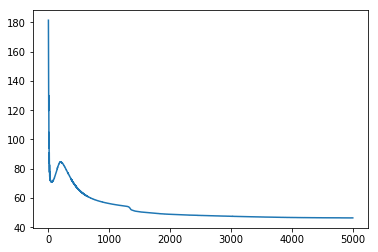

In [9]:
errors = np.array(errors)
plt.plot(errors/10000)

## Function to recreate visible units

In [10]:
def run_visible(data, weights, num_hidden):
    """
    Assuming the RBM has been trained (so that weights for the network have been learned),
    run the network on a set of visible units, to get a sample of the hidden units.
    
    Parameters
    ----------
    data: A matrix where each row consists of the states of the visible units.
    
    Returns
    -------
    hidden_states: A matrix where each row consists of the hidden units activated from the visible
    units in the data matrix passed in.
    """
    
    num_examples = data.shape[0]
    
    # Create a matrix, where each row is to be the hidden units (plus a bias unit)
    # sampled from a training example.
    hidden_states = np.ones((num_examples, num_hidden + 1))
    
    # Insert bias units of 1 into the first column of data.
    data = np.insert(data, 0, 1, axis = 1)

    # Calculate the activations of the hidden units.
    hidden_activations = np.dot(data, weights)
    # Calculate the probabilities of turning the hidden units on.
    hidden_probs = logistic(hidden_activations)
    # Turn the hidden units on with their specified probabilities.
    hidden_states[:,:] = hidden_probs > np.random.rand(num_examples, num_hidden + 1)
#     for i in range(hidden_states.shape[0]):
#         hidden_states[i,:] = hidden_states[i,:]/np.max(hidden_states[i,1:])
    # Always fix the bias unit to 1.
    # hidden_states[:,0] = 1
    hidden_states[:,:] = hidden_states==1
    # Ignore the bias units.
    hidden_states = hidden_states[:,1:]
    return hidden_states

In [11]:
def run_hidden(data, weights, num_visible):
    """
    Assuming the RBM has been trained (so that weights for the network have been learned),
    run the network on a set of hidden units, to get a sample of the visible units.
    Parameters
    ----------
    data: A matrix where each row consists of the states of the hidden units.
    Returns
    -------
    visible_states: A matrix where each row consists of the visible units activated from the hidden
    units in the data matrix passed in.
    """

    num_examples = data.shape[0]

    # Create a matrix, where each row is to be the visible units (plus a bias unit)
    # sampled from a training example.
    visible_states = np.ones((num_examples, num_visible + 1))

    # Insert bias units of 1 into the first column of data.
    data = np.insert(data, 0, 1, axis = 1)

    # Calculate the activations of the visible units.
    visible_activations = np.dot(data, weights.T)
    # Calculate the probabilities of turning the visible units on.
    visible_probs = logistic(visible_activations)
    # Turn the visible units on with their specified probabilities.
    visible_states[:,:] = visible_probs > np.random.rand(num_examples, num_visible + 1)
    # Always fix the bias unit to 1.
    # visible_states[:,0] = 1

    # Ignore the bias units.
    visible_states = visible_states[:,1:]
    return visible_states

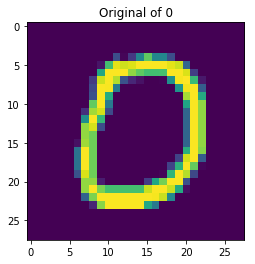

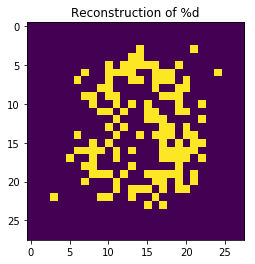

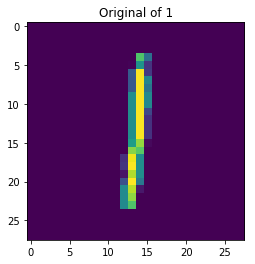

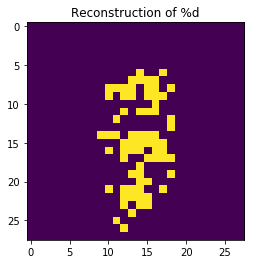

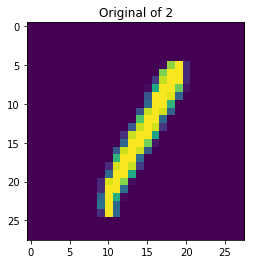

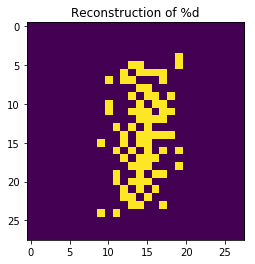

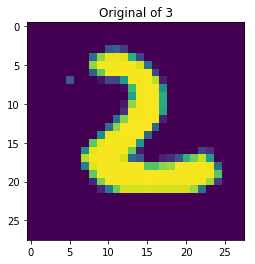

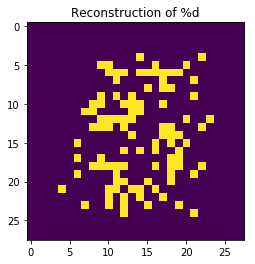

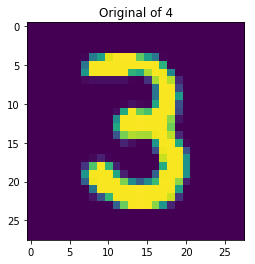

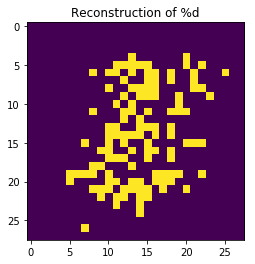

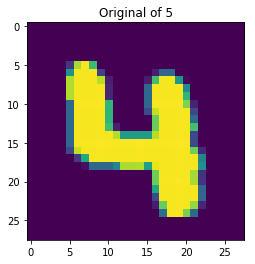

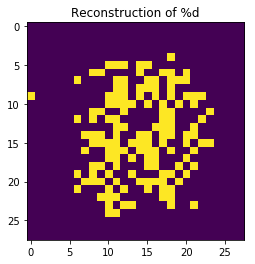

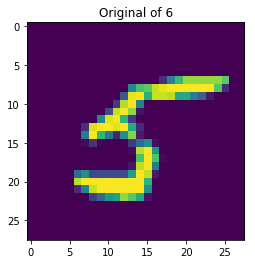

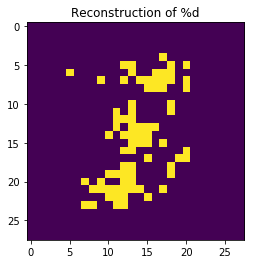

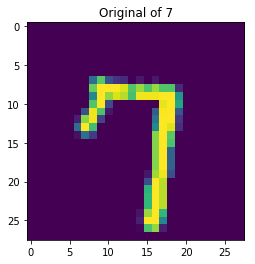

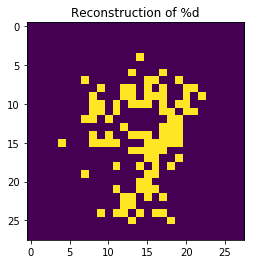

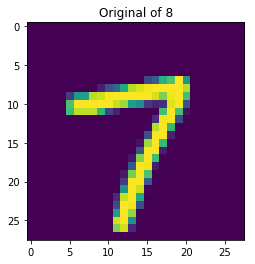

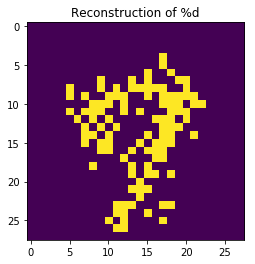

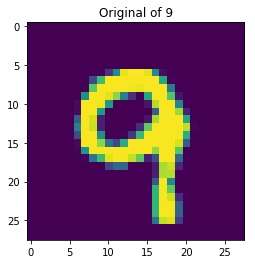

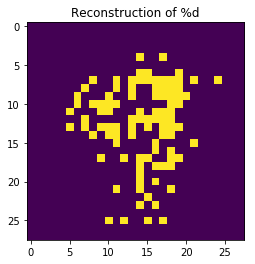

In [20]:
# hidden = np.zeros((10,10))
visible = []
for i in range(0,10):
#     hidden[i,i] = 1
    visible.append(data[i*1000+1])

visible = np.array(visible)
# visible = run_hidden(hidden, weights, num_visible)
hidden = run_visible(visible, weights, num_hidden)

visible_recons = run_hidden(hidden,weights,num_visible)

# print(hidden)

for i in range(10):
    plt.figure()
    plt.title('Original of %d'%i)
    plt.imshow(np.reshape(visible[i],(28,28)))
    plt.figure()
    plt.title('Reconstruction of %d')
    plt.imshow(np.reshape(visible_recons[i],(28,28)))